In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transport-details/DEVASHREE NEW 2024 2.xlsx


In [2]:
file_path='/kaggle/input/transport-details/DEVASHREE NEW 2024 2.xlsx'

In [3]:
df=pd.read_excel(file_path,sheet_name='Sheet1',usecols=range(8))

In [4]:
df.dtypes

LO DATE       object
UN DATE       object
PARTY         object
VECHILE NO    object
GC            object
L.W           object
FRIGHT        object
TOTAL         object
dtype: object

In [5]:
df.head()

,LO DATE,UN DATE,PARTY,VECHILE NO,GC,L.W,FRIGHT,TOTAL
0,2022-11-15 00:00:00,2022-11-17 00:00:00,JEEVAKA NETTING,TS07UF4929,132,51.75,NaN,NaN
1,2022-11-11 00:00:00,2022-11-15 00:00:00,JEEVAKA NETTING,TS06UA4712,03,48.99,NaN,NaN
2,2022-11-12 00:00:00,2022-11-15 00:00:00,JEEVAKA NETTING,TS07UA9099,12,46.94,NaN,NaN
3,2022-11-12 00:00:00,2022-11-13 00:00:00,JEEVAKA NETTING,TS06UC7272,13,55.31,NaN,NaN
4,2022-11-14 00:00:00,2022-11-16 00:00:00,SUSHMA,TS07UA3339,36,48.57,NaN,NaN


In [6]:
# Filter out rows containing header-like text 
df = df[~df.apply(lambda row: row.astype(str).str.contains('HEADER|LO DATE|UN DATE|PARTY|VECHILE NO|GC|L.W|FRIGHT|TOTAL', na=False).any(), axis=1)]

# Reset the index of the cleaned dataframe
df.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
print(df.head())

               LO DATE              UN DATE            PARTY  VECHILE NO   GC  \
0  2022-11-15 00:00:00  2022-11-17 00:00:00  JEEVAKA NETTING  TS07UF4929  132   
1  2022-11-11 00:00:00  2022-11-15 00:00:00  JEEVAKA NETTING  TS06UA4712   03   
2  2022-11-12 00:00:00  2022-11-15 00:00:00  JEEVAKA NETTING  TS07UA9099   12   
3  2022-11-12 00:00:00  2022-11-13 00:00:00  JEEVAKA NETTING  TS06UC7272   13   
4  2022-11-14 00:00:00  2022-11-16 00:00:00          SUSHMA   TS07UA3339   36   

     L.W FRIGHT TOTAL  
0  51.75    NaN   NaN  
1  48.99    NaN   NaN  
2  46.94    NaN   NaN  
3  55.31    NaN   NaN  
4  48.57    NaN   NaN  


In [7]:
  # This will drop rows that are completely (NaN in all columns)
df = df.dropna(how='all')


In [8]:
df[['LO DATE', 'UN DATE']] = df[['LO DATE', 'UN DATE']].apply(pd.to_datetime, errors='coerce', format="%Y-%m-%d")
df[['PARTY', 'VECHILE NO']] = df[['PARTY', 'VECHILE NO']].astype(str)



In [9]:
df[['GC', 'FRIGHT']] = df[['GC', 'FRIGHT']].apply(pd.to_numeric, errors='coerce')
df[['GC', 'FRIGHT']] = df[['GC', 'FRIGHT']].astype('Int64')  # Optional: Convert to nullable Int64



In [10]:
df.dtypes

LO DATE       datetime64[ns]
UN DATE       datetime64[ns]
PARTY                 object
VECHILE NO            object
GC                     Int64
L.W                   object
FRIGHT                 Int64
TOTAL                 object
dtype: object

In [11]:
#This displays all the rows where at least one value is NaN
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

        LO DATE    UN DATE                    PARTY            VECHILE NO  \
0    2022-11-15 2022-11-17          JEEVAKA NETTING            TS07UF4929   
1    2022-11-11 2022-11-15          JEEVAKA NETTING            TS06UA4712   
2    2022-11-12 2022-11-15          JEEVAKA NETTING            TS07UA9099   
3    2022-11-12 2022-11-13          JEEVAKA NETTING            TS06UC7272   
4    2022-11-14 2022-11-16                  SUSHMA             TS07UA3339   
5    2022-11-15 2022-11-16                 ILC IRON            TS07UC0804   
9    2022-11-13 2022-11-13          JEEVAKA NETTING            TS06UC6989   
10   2022-11-15 2022-11-15          JEEVAKA NETTING            TS13UC0189   
148         NaT        NaT                      nan  MANJUNATHA TRANSPORT   
978  2023-11-25 2023-12-01      KAMINI IRON & STEEL            TS07UC0918   
979  2023-11-28 2023-12-01      KAMINI IRON & STEEL            TS06UC7272   
980  2023-11-30 2023-12-02    BAB AKHILA SAI JYOTHI            TS07UA9099   

In [12]:
nan_rows = df[df[['LO DATE', 'UN DATE']].isna().any(axis=1)]
print(nan_rows)


        LO DATE    UN DATE          PARTY            VECHILE NO    GC    L.W  \
148         NaT        NaT            nan  MANJUNATHA TRANSPORT  <NA>    NaN   
1101 2023-01-04        NaT          43.45                   225  <NA>    NaN   
1102 2023-01-04        NaT          45.28                   225  <NA>    NaN   
1746        NaT 2024-08-20  APPLE SURAIDO            TS06UB4762  1200  45.24   

      FRIGHT    TOTAL  
148     <NA>      NaN  
1101    <NA>  9776.25  
1102    <NA>    10188  
1746     900    40716  


In [13]:
#df[['LO DATE', 'UN DATE']]=df[['LO DATE','UN DATE' ]].interpolate(method='linear')

In [14]:

nan_rows1 = df[df['L.W'].isna()]  # Select rows where 'L.W' is NaN
df = df.drop(nan_rows1.index)  # Drop these rows using their index

In [15]:
df['FRIGHT'] = df['FRIGHT'].fillna(900)


In [16]:
#THERE IS A WRONG ENTRY WHERE LODATE=2002 WHICH IS ACTUALLY 2024 WE CAME ACROSS THIS ERROR WHILE PLOTTING SNS COUNTPLOT BY YEAR SO IAM REPLACING THAT
df['LO DATE'] = df['LO DATE'].apply(lambda x: x.replace(year=2024) if x.year == 2002 else x)


In [17]:
df['TOTAL'] = df['TOTAL'].fillna(df['FRIGHT'] * df['L.W'])


In [18]:
nan_count = df.isna().sum()  # Counts NaNs in each column
print(nan_count)

LO DATE       1
UN DATE       0
PARTY         0
VECHILE NO    0
GC            0
L.W           0
FRIGHT        0
TOTAL         0
dtype: int64


In [19]:
print(df['LO DATE'].isna().sum())  # Count NaT values
print(df[df['LO DATE'].isna()])
df['LO DATE'] = df['LO DATE'].ffill()  
print(df[df['GC'] == 1200])

1
     LO DATE    UN DATE          PARTY  VECHILE NO    GC    L.W  FRIGHT  TOTAL
1746     NaT 2024-08-20  APPLE SURAIDO  TS06UB4762  1200  45.24     900  40716
        LO DATE    UN DATE          PARTY  VECHILE NO    GC    L.W  FRIGHT  \
1746 2024-08-19 2024-08-20  APPLE SURAIDO  TS06UB4762  1200  45.24     900   

      TOTAL  
1746  40716  


In [20]:
df.head(25)

,LO DATE,UN DATE,PARTY,VECHILE NO,GC,L.W,FRIGHT,TOTAL
0,2022-11-15,2022-11-17,JEEVAKA NETTING,TS07UF4929,132,51.75,900,46575.0
1,2022-11-11,2022-11-15,JEEVAKA NETTING,TS06UA4712,3,48.99,900,44091.0
2,2022-11-12,2022-11-15,JEEVAKA NETTING,TS07UA9099,12,46.94,900,42246.0
3,2022-11-12,2022-11-13,JEEVAKA NETTING,TS06UC7272,13,55.31,900,49779.0
4,2022-11-14,2022-11-16,SUSHMA,TS07UA3339,36,48.57,900,43713.0
5,2022-11-15,2022-11-16,ILC IRON,TS07UC0804,127,51.27,900,46143.0
9,2022-11-13,2022-11-13,JEEVAKA NETTING,TS06UC6989,23,60.34,900,54306.0
10,2022-11-15,2022-11-15,JEEVAKA NETTING,TS13UC0189,22,60.44,900,54396.0
14,2022-11-16,2022-11-18,APPLE SURAIDO,TS07UC0803,140,45.38,900,40842
15,2022-11-18,2022-11-19,KAMINI IRON,TS08UD2789,197,52.44,900,47196


In [21]:
counts = df['PARTY'].value_counts()
print((counts.head(60)))


PARTY
APPLE SURAIDO                  148
KAMINI IRON & STEEL            108
JEEVAKA NETTING                 87
ILC IRON & STEEL                60
AARAL MARKETING                 48
M/S KAMINI IRON & STEEL         47
M/S AARAL MARKETING             45
M/S JEEVAKA NETTING             44
BABA AKHILA SAI JYOTHI          40
M/S APPLE SURAIDO FITTING       35
M/S I.L.C IRON & STEEL          33
M/S APPLE SURAIDO FITTINGS      32
M/S APPLE SURAIDO               30
KAMINI IRON                     28
M/S KOTHARI ISPAT               26
M/S SWASTIK STEELS              25
KANIKA ISPAT                    24
VANYA STEELS                    23
M/S RAJENDER METALLIC           22
A.S IRON & STEEL                20
RAJENDER METALLICS              18
SD CORP                         18
M/S AKASH STEELS                17
M/S KAMINI IRON & STEELS        16
KAMINI IRON AND STEEL           15
M/S VANYA STEELS                14
TN COMMERCIAL                   14
M/S KAMINI IRON                 13
M/S SRI KRISHN

In [22]:
len(counts)

180

In [23]:
"""
df['PARTY'] = df['PARTY'].apply(lambda x: 'M/S KAMINI IRON & STEEL' if 'KAMINI' in x else x)
df['PARTY'] = df['PARTY'].apply(lambda x: 'M/S APPLE SURAIDO FITTINGS' if 'APPLE' in x else x)
df['PARTY'] = df['PARTY'].apply(lambda x: 'M/S JEEVAKA NETTING ' if 'JEEVAKA' in x else x)
df['PARTY'] = df['PARTY'].apply(lambda x: 'M/S ILC IRON & STEEL ' if 'ILC' in x else x)
df['PARTY'] = df['PARTY'].apply(lambda x: 'M/S ILC IRON & STEEL ' if 'I.L.C' in x else x)
df['PARTY'] = df['PARTY'].apply(lambda x: 'M/S AARAL MARKETING ' if 'AARAL' in x else x)
df['PARTY'] = df['PARTY'].apply(lambda x: 'M/S ARCHANA IRON TRADERS' if 'ARCHANA' in x else x) 
"""


"\ndf['PARTY'] = df['PARTY'].apply(lambda x: 'M/S KAMINI IRON & STEEL' if 'KAMINI' in x else x)\ndf['PARTY'] = df['PARTY'].apply(lambda x: 'M/S APPLE SURAIDO FITTINGS' if 'APPLE' in x else x)\ndf['PARTY'] = df['PARTY'].apply(lambda x: 'M/S JEEVAKA NETTING ' if 'JEEVAKA' in x else x)\ndf['PARTY'] = df['PARTY'].apply(lambda x: 'M/S ILC IRON & STEEL ' if 'ILC' in x else x)\ndf['PARTY'] = df['PARTY'].apply(lambda x: 'M/S ILC IRON & STEEL ' if 'I.L.C' in x else x)\ndf['PARTY'] = df['PARTY'].apply(lambda x: 'M/S AARAL MARKETING ' if 'AARAL' in x else x)\ndf['PARTY'] = df['PARTY'].apply(lambda x: 'M/S ARCHANA IRON TRADERS' if 'ARCHANA' in x else x) \n"

In [24]:
"""party_map = {
    'KAMINI': 'M/S KAMINI IRON & STEEL',
    'APPLE': 'M/S APPLE SURAIDO FITTINGS',
    'JEEVAKA': 'M/S JEEVAKA NETTING',
    'ILC': 'M/S ILC IRON & STEEL',
    'I.L.C': 'M/S ILC IRON & STEEL',
    'AARAL': 'M/S AARAL MARKETING',
    'BABA': 'M/S BABA AKHILA JYOTHI',
    'ARCHANA': 'M/S ARCHANA IRON TRADERS',
    "SD CORP": "M/S SD CORP",
    "S.D CORP": "M/S SD CORP",
    "S.D CORPORATION": "M/S SD CORP",
    "S D CORP": "M/S SD CORP",
    'SD CROP': "M/S SD CORP", 
    "TN COMMERCIAL": "M/S T.N COMMERCIAL",
    "T N COMMERCIALS": "M/S T.N COMMERCIAL",
    "T.N COMMERCIAL": "M/S T.N COMMERCIAL",
    "T N COMMERCIAL": "M/S T.N COMMERCIAL",
    "TN COMMERCIALS": "M/S T.N COMMERCIAL",
    "T N COMMERICIALS": "M/S T.N COMMERCIAL",
    
    "SHREE MAHAVIR": "M/S SHREE MAHAVIR STEELS",
    "SHREE MAHAVIR STEELS": "M/S SHREE MAHAVIR STEELS",
    "SHREE MAHAVIR STEEL": "M/S SHREE MAHAVIR STEELS",
    
    "KANIKA ISPAT": "M/S KANIKA ISPAT",
    "M/S KANIKA ISPAT PVT LTD": "M/S KANIKA ISPAT",
    
    "VANYA STEELS": "M/S VANYA STEELS",
    "VANYA STEEL": "M/S VANYA STEELS",
    
    "A.S IRON & STEEL": "M/S A.S IRON & STEEL",
    "A S IRON & STEEL": "M/S A.S IRON & STEEL",
    'AS IRON & STEEL ':"M/S A.S IRON & STEEL",
    "RAJENDER METALLICS": "M/S RAJENDER METALLIC",
    "M/S RAJENDER METTALIC": "M/S RAJENDER METALLIC",
    "RAJENDRA METALLIC": "M/S RAJENDER METALLIC",
    "RAJENDRA METALLICS": "M/S RAJENDER METALLIC",
    
    "BHADRASHREE STEEL": "M/S BHADRASHREE STEEL",
    "M/S BHADRASHREE STEEL": "M/S BHADRASHREE STEEL",
    "BHADRA SHREE STEELS": "M/S BHADRASHREE STEEL",
    
    "M/S HARIOM PIPE INDUSTRIES": "M/S HARIOM PIPE INDUSTRIES",
    "M/S HARIOM PIPES": "M/S HARIOM PIPE INDUSTRIES",
    'HARI OM PIPE':"M/S HARIOM PIPE INDUSTRIES",
    "SATVIK GLOBAL": "M/S SATVIK GLOBAL",
    'KARNATAKA FERRO':'M/S KARNATAKA FERRO',
    'SRI KRISHNA STEELS':'M/S SRI KRISHNA STEELS ',
    'SRI KRISHNA STEEL':'M/S SRI KRISHNA STEELS '
}
df['PARTY'] = df['PARTY'].apply(lambda x: next(
    (replacement for key, replacement in party_map.items() if key in x), x
))"""

'party_map = {\n    \'KAMINI\': \'M/S KAMINI IRON & STEEL\',\n    \'APPLE\': \'M/S APPLE SURAIDO FITTINGS\',\n    \'JEEVAKA\': \'M/S JEEVAKA NETTING\',\n    \'ILC\': \'M/S ILC IRON & STEEL\',\n    \'I.L.C\': \'M/S ILC IRON & STEEL\',\n    \'AARAL\': \'M/S AARAL MARKETING\',\n    \'BABA\': \'M/S BABA AKHILA JYOTHI\',\n    \'ARCHANA\': \'M/S ARCHANA IRON TRADERS\',\n    "SD CORP": "M/S SD CORP",\n    "S.D CORP": "M/S SD CORP",\n    "S.D CORPORATION": "M/S SD CORP",\n    "S D CORP": "M/S SD CORP",\n    \'SD CROP\': "M/S SD CORP", \n    "TN COMMERCIAL": "M/S T.N COMMERCIAL",\n    "T N COMMERCIALS": "M/S T.N COMMERCIAL",\n    "T.N COMMERCIAL": "M/S T.N COMMERCIAL",\n    "T N COMMERCIAL": "M/S T.N COMMERCIAL",\n    "TN COMMERCIALS": "M/S T.N COMMERCIAL",\n    "T N COMMERICIALS": "M/S T.N COMMERCIAL",\n    \n    "SHREE MAHAVIR": "M/S SHREE MAHAVIR STEELS",\n    "SHREE MAHAVIR STEELS": "M/S SHREE MAHAVIR STEELS",\n    "SHREE MAHAVIR STEEL": "M/S SHREE MAHAVIR STEELS",\n    \n    "KANIKA ISPAT"

In [25]:
"""import pandas as pd
import difflib

# Example function using fuzzy matching
def get_closest_match(value, mapping, threshold=0.7):
    matches = difflib.get_close_matches(value, mapping.keys(), n=1, cutoff=threshold)
    return mapping[matches[0]] if matches else value

df['PARTY'] = df['PARTY'].apply(lambda x: get_closest_match(x, party_map))"""


"import pandas as pd\nimport difflib\n\n# Example function using fuzzy matching\ndef get_closest_match(value, mapping, threshold=0.7):\n    matches = difflib.get_close_matches(value, mapping.keys(), n=1, cutoff=threshold)\n    return mapping[matches[0]] if matches else value\n\ndf['PARTY'] = df['PARTY'].apply(lambda x: get_closest_match(x, party_map))"

In [26]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from rapidfuzz import process
# List of standard party names
unique_parties = [
    "M/S APPLE SURAIDO FITTINGS",
    "M/S KAMINI IRON & STEEL",
    "M/S ILC IRON & STEEL",
    "M/S JEEVAKA NETTING",
    "M/S AARAL MARKETING",
    "M/S BABA AKHILA JYOTHI",
    "M/S ARCHANA IRON TRADERS",
    "M/S KOTHARI ISPAT",
    "M/S SWASTIK STEELS",
    "M/S KANIKA ISPAT",
    "M/S VANYA STEELS",
    "M/S RAJENDER METALLIC",
    "M/S A.S IRON & STEEL",
    "M/S SD CORP",
    "M/S AKASH STEELS",
    "M/S VANYA STEELS",
    "M/S SRI KRISHNA STEELS",
    "M/S SUSHMA SALES",
    "M/S ANUPAM FUELS",
    "M/S SATVIK GLOBAL",
    "RAM SHYAM ENTERPRISES",
    "M/S SHREE MAHAVIR STEELS",
    "M/S BHADRASHREE STEEL",
    "M/S T.N COMMERCIAL",
    "KARNATAKA FERRO",
    "M/S SHARMA STEELS",
    "M/S SHREEM TRADERS",
    "M/S RADHA STEEL",
    "M/S ACS ETERNAL METAL",
    "M/S PRANAY ISPAT",
    "M/S HARIOM PIPE INDUSTRIES",
    "M/S TUNICS SPONGE",
    "M/S TANUSH ISPAT",
]
# Function to find the best match using (fuzzy matching)
def get_best_match(value, choices, threshold=73):
    match = process.extractOne(value, choices, score_cutoff=threshold)
    return match[0] if match else value  # Return best match or original value

# Apply fuzzy matching to clean the 'PARTY' column
df['PARTY'] = df['PARTY'].apply(lambda x: get_best_match(x, unique_parties))



In [28]:
# printing unmatched values
unmatched = df[~df['PARTY'].isin(unique_parties)]
if not unmatched.empty:
    print("Unmatched Values for Review:")
    print(unmatched['PARTY'].unique())

# Display cleaned df
print(df['PARTY'].value_counts())

Unmatched Values for Review:
['BINDHU SARIA' 'AGARWAL SPONGE' 'GARG STEEL TRADING'
 'SAIVIJAY PRAGATI STEEL' 'S.D CORPORATION' 'V R INTERNATIONAL' 'RAJ EXIM']
PARTY
M/S KAMINI IRON & STEEL       271
M/S APPLE SURAIDO FITTINGS    258
M/S ILC IRON & STEEL          142
M/S JEEVAKA NETTING           137
M/S AARAL MARKETING            94
M/S RAJENDER METALLIC          67
M/S BABA AKHILA JYOTHI         57
M/S T.N COMMERCIAL             56
M/S VANYA STEELS               54
M/S SD CORP                    51
M/S SHREE MAHAVIR STEELS       42
M/S KANIKA ISPAT               40
M/S ARCHANA IRON TRADERS       33
M/S A.S IRON & STEEL           31
M/S SWASTIK STEELS             31
M/S KOTHARI ISPAT              27
M/S BHADRASHREE STEEL          27
M/S SRI KRISHNA STEELS         25
M/S SATVIK GLOBAL              21
M/S ANUPAM FUELS               20
M/S AKASH STEELS               18
RAM SHYAM ENTERPRISES          18
M/S SUSHMA SALES               17
KARNATAKA FERRO                13
M/S RADHA STEEL    

In [29]:
party_map = {

    "S.D CORPORATION": "M/S SD CORP",

}
df['PARTY'] = df['PARTY'].apply(lambda x: next(
    (replacement for key, replacement in party_map.items() if key in x), x
))

In [30]:
"""# Dictionary mapping variations to standardized names
standardization_map = {
    "M/S SD CORP": ["SD CORP", "S.D CORP", "S.D CORPORATION", "S D CORP"],
    "M/S T.N COMMERCIAL": ["TN COMMERCIAL", "T N COMMERCIALS", "T.N COMMERCIAL", "T N COMMERCIAL", "TN COMMERCIALS", "T N COMMERICIALS"],
    "M/S SHREE MAHAVIR STEELS": ["SHREE MAHAVIR", "SHREE MAHAVIR STEELS", "SHREE MAHAVIR STEEL"],
    "M/S KANIKA ISPAT": ["KANIKA ISPAT", "M/S KANIKA ISPAT PVT LTD"],
    "M/S VANYA STEELS": ["VANYA STEELS", "VANYA STEEL"],
    "M/S A.S IRON & STEEL": ["A.S IRON & STEEL", "A S IRON & STEEL"],
    "M/S RAJENDER METALLIC": ["RAJENDER METALLICS", "M/S RAJENDER METTALIC", "RAJENDRA METALLIC", "RAJENDRA METALLICS"],
    "M/S BHADRASHREE STEEL": ["BHADRASHREE STEEL", "M/S BHADRASHREE STEEL", "BHADRA SHREE STEELS"],
    "M/S HARIOM PIPE INDUSTRIES": ["M/S HARIOM PIPE INDUSTRIES", "M/S HARIOM PIPES"],
    "M/S SATVIK GLOBAL": ["SATVIK GLOBAL"],
}

# Function to replace variations in the original dataset
def replace_variations(df, column, mapping):
    for standard, variations in mapping.items():
        df[column] = df[column].replace(variations + [standard], standard)

# Apply replacements
replace_variations(df, 'PARTY', standardization_map)

# Remove duplicates while maintaining order
df = df.drop_duplicates(subset=['PARTY'])

# Print result
print(df)
"""

'# Dictionary mapping variations to standardized names\nstandardization_map = {\n    "M/S SD CORP": ["SD CORP", "S.D CORP", "S.D CORPORATION", "S D CORP"],\n    "M/S T.N COMMERCIAL": ["TN COMMERCIAL", "T N COMMERCIALS", "T.N COMMERCIAL", "T N COMMERCIAL", "TN COMMERCIALS", "T N COMMERICIALS"],\n    "M/S SHREE MAHAVIR STEELS": ["SHREE MAHAVIR", "SHREE MAHAVIR STEELS", "SHREE MAHAVIR STEEL"],\n    "M/S KANIKA ISPAT": ["KANIKA ISPAT", "M/S KANIKA ISPAT PVT LTD"],\n    "M/S VANYA STEELS": ["VANYA STEELS", "VANYA STEEL"],\n    "M/S A.S IRON & STEEL": ["A.S IRON & STEEL", "A S IRON & STEEL"],\n    "M/S RAJENDER METALLIC": ["RAJENDER METALLICS", "M/S RAJENDER METTALIC", "RAJENDRA METALLIC", "RAJENDRA METALLICS"],\n    "M/S BHADRASHREE STEEL": ["BHADRASHREE STEEL", "M/S BHADRASHREE STEEL", "BHADRA SHREE STEELS"],\n    "M/S HARIOM PIPE INDUSTRIES": ["M/S HARIOM PIPE INDUSTRIES", "M/S HARIOM PIPES"],\n    "M/S SATVIK GLOBAL": ["SATVIK GLOBAL"],\n}\n\n# Function to replace variations in the origi

In [31]:
counts = df['PARTY'].value_counts()
print((counts.head(60)))

PARTY
M/S KAMINI IRON & STEEL       271
M/S APPLE SURAIDO FITTINGS    258
M/S ILC IRON & STEEL          142
M/S JEEVAKA NETTING           137
M/S AARAL MARKETING            94
M/S RAJENDER METALLIC          67
M/S BABA AKHILA JYOTHI         57
M/S SD CORP                    57
M/S T.N COMMERCIAL             56
M/S VANYA STEELS               54
M/S SHREE MAHAVIR STEELS       42
M/S KANIKA ISPAT               40
M/S ARCHANA IRON TRADERS       33
M/S A.S IRON & STEEL           31
M/S SWASTIK STEELS             31
M/S KOTHARI ISPAT              27
M/S BHADRASHREE STEEL          27
M/S SRI KRISHNA STEELS         25
M/S SATVIK GLOBAL              21
M/S ANUPAM FUELS               20
M/S AKASH STEELS               18
RAM SHYAM ENTERPRISES          18
M/S SUSHMA SALES               17
KARNATAKA FERRO                13
M/S RADHA STEEL                11
M/S HARIOM PIPE INDUSTRIES     10
M/S SHARMA STEELS               9
M/S PRANAY ISPAT                8
M/S SHREEM TRADERS              7
M/S ACS 

In [32]:
"""df['LO DATE'] = pd.to_datetime(df['LO DATE'])  # Ensure 'LO DATE' is in datetime format

df['year'] = df['LO DATE'].dt.year
df['month'] = df['LO DATE'].dt.month
df['day'] = df['LO DATE'].dt.day
df"""

"df['LO DATE'] = pd.to_datetime(df['LO DATE'])  # Ensure 'LO DATE' is in datetime format\n\ndf['year'] = df['LO DATE'].dt.year\ndf['month'] = df['LO DATE'].dt.month\ndf['day'] = df['LO DATE'].dt.day\ndf"

In [33]:
# Extract year, month, and day for both columns
df[['LO_year', 'UN_year']] = df[['LO DATE', 'UN DATE']].apply(lambda x: x.dt.year)
df[['LO_month', 'UN_month']] = df[['LO DATE', 'UN DATE']].apply(lambda x: x.dt.month)
df[['LO_day', 'UN_day']] = df[['LO DATE', 'UN DATE']].apply(lambda x: x.dt.day)
df.tail()

,LO DATE,UN DATE,PARTY,VECHILE NO,GC,L.W,FRIGHT,TOTAL,LO_year,UN_year,LO_month,UN_month,LO_day,UN_day
2259,2025-01-10,2025-01-12,M/S KAMINI IRON & STEEL,TS06UC7299,3088,44.96,1000,44960,2025,2025,1,1,10,12
2260,2025-01-09,2025-01-12,M/S KAMINI IRON & STEEL,TS07UF4994,3078,51.63,1000,51630,2025,2025,1,1,9,12
2261,2025-01-12,2025-01-13,M/S APPLE SURAIDO FITTINGS,TS07UH4239,3158,44.99,1000,44990,2025,2025,1,1,12,13
2262,2025-01-11,2025-01-14,M/S APPLE SURAIDO FITTINGS,TS07UE2111,3169,51.85,1000,51850,2025,2025,1,1,11,14
2263,2025-01-11,2025-01-14,M/S APPLE SURAIDO FITTINGS,TS07UC8019,3097,46.66,1000,46660,2025,2025,1,1,11,14


In [34]:
df.dtypes

LO DATE       datetime64[ns]
UN DATE       datetime64[ns]
PARTY                 object
VECHILE NO            object
GC                     Int64
L.W                   object
FRIGHT                 Int64
TOTAL                 object
LO_year                int32
UN_year                int32
LO_month               int32
UN_month               int32
LO_day                 int32
UN_day                 int32
dtype: object

In [35]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [36]:
"""# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Freight Truck Arrivals, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['LO_month'], y=df['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")"""

'# Set the width and height of the figure\nplt.figure(figsize=(10,6))\n\n# Add title\nplt.title("Freight Truck Arrivals, by Month")\n\n# Bar chart showing average arrival delay for Spirit Airlines flights by month\nsns.barplot(x=df[\'LO_month\'], y=df[\'NK\'])\n\n# Add label for vertical axis\nplt.ylabel("Arrival delay (in minutes)")'

<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2022'}, xlabel='LO_month', ylabel='count'>

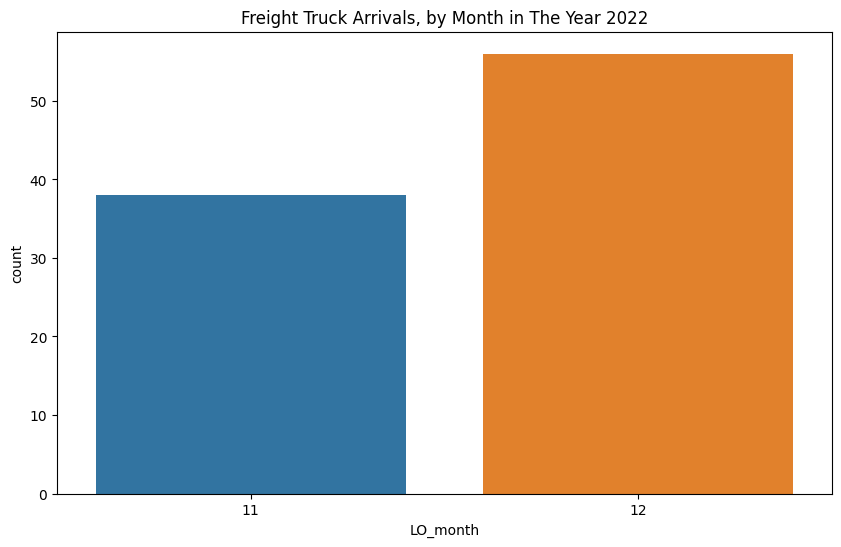

In [37]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2022")
df_2022 = df[df['LO_year'] == 2022]
sns.countplot(x=df_2022['LO_month'])


<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2023'}, xlabel='LO_month', ylabel='count'>

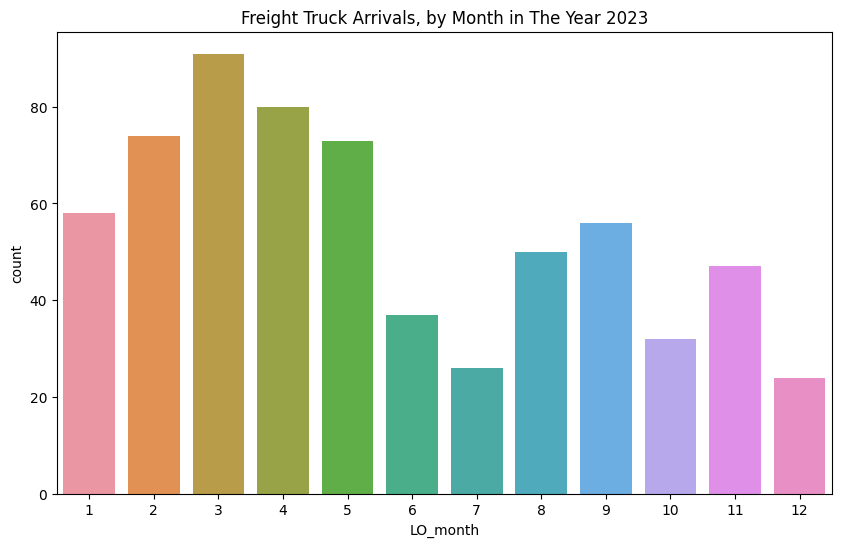

In [38]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2023")
df_2023 = df[df['LO_year'] == 2023]
sns.countplot(x=df_2023['LO_month'])

<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2024'}, xlabel='LO_month', ylabel='count'>

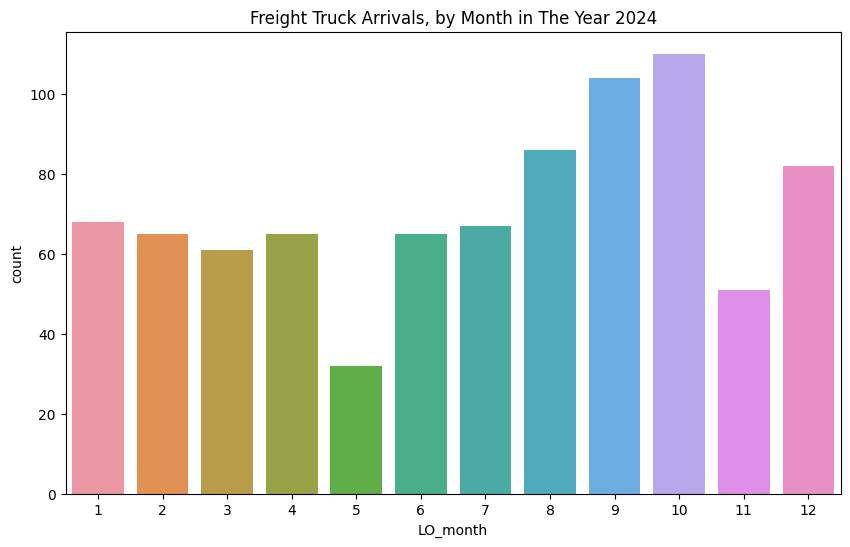

In [39]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2024")
df_2024 = df[df['LO_year'] == 2024]
sns.countplot(x=df_2024['LO_month'])

<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2025'}, xlabel='LO_month', ylabel='count'>

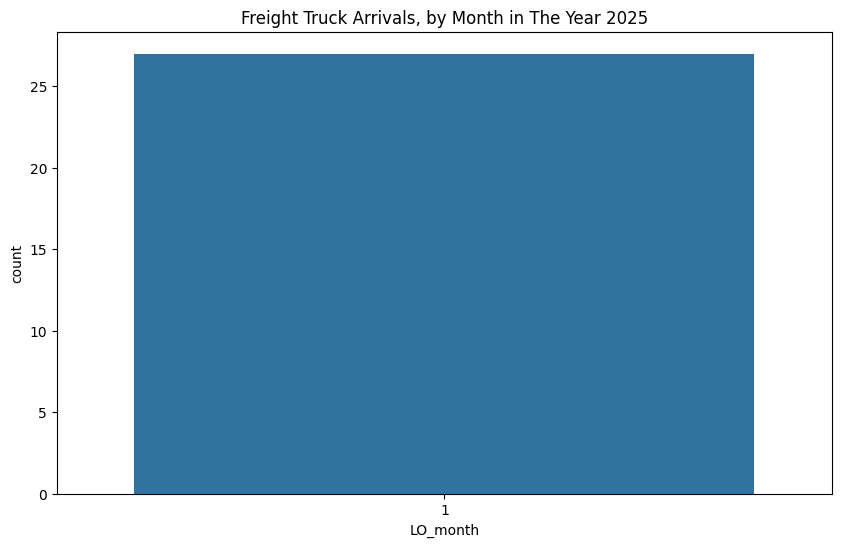

In [40]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2025")
df_2025 = df[df['LO_year'] == 2025]
sns.countplot(x=df_2025['LO_month'])

In [41]:
import ipywidgets as widgets
from IPython.display import display

# Get unique years from the dataset
unique_years = sorted(df['LO_year'].unique())

# Create a dropdown widget
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[0],  # Default value
    description='Select Year:',
    style={'description_width': 'initial'}
)

# Function to update the plot
def plot_data(YEAR):
    plt.figure(figsize=(10,6))
    plt.title(f"Freight Truck Arrivals, by Month in The Year {YEAR}")
    df_YEAR = df[df['LO_year'] == YEAR]
    sns.countplot(data=df_YEAR, x="LO_month")
    plt.show()

# Use an interactive widget to update the graph when dropdown changes
interactive_plot = widgets.interactive(plot_data, YEAR=year_dropdown)

# Display only the interactive widget (removes duplicate dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Select Year:', options=(2022, 2023, 2024, 2025), style=Description…

<Axes: title={'center': 'Freight Truck Arrivals,  in The Year'}, xlabel='LO_year', ylabel='count'>

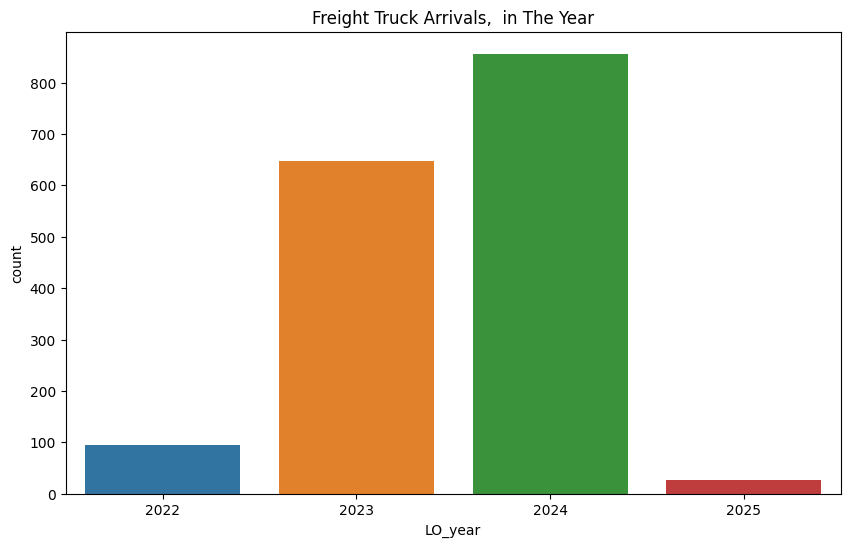

In [42]:
plt.figure(figsize=(10,6))
plt.title(f"Freight Truck Arrivals,  in The Year")
sns.countplot(data=df,x="LO_year")

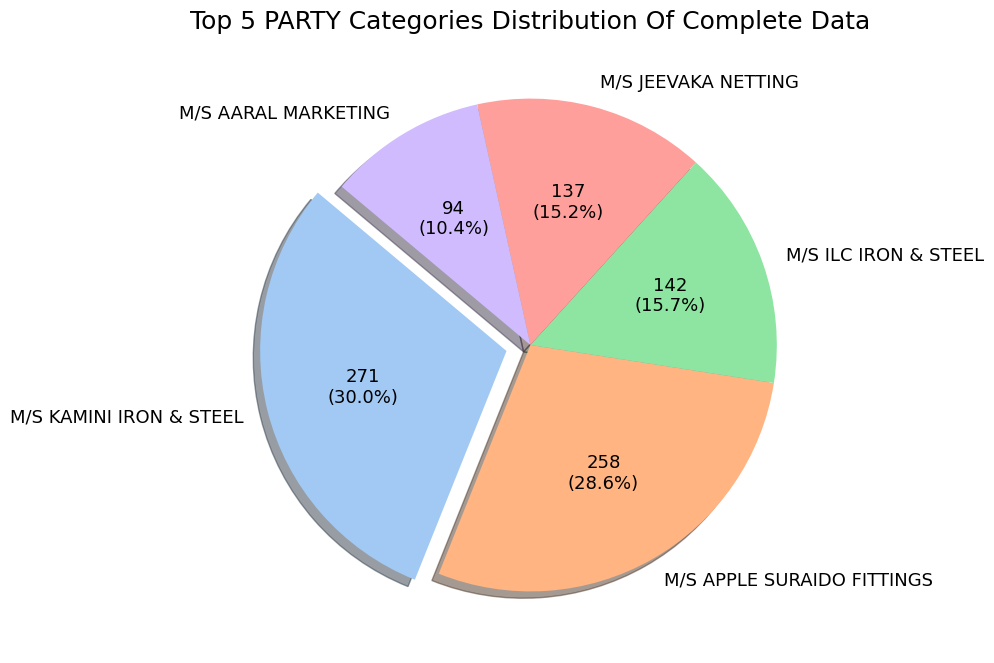

In [43]:
party_counts = df['PARTY'].value_counts().head()

labels = party_counts.index
sizes = party_counts.values

# Define Seaborn color palette (matching the number of labels)
colors = sns.color_palette("pastel", len(labels))
# Create an "explode" effect (only explode the largest category)
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]
# function to show count and percentage
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))  # Convert percentage to count
    return f"{absolute}\n({pct:.1f}%)"  # Show both count and percentage
# pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: autopct_format(pct, sizes), 
    colors=colors, 
    explode=explode,
    startangle=140, 
    shadow=True,
    textprops={'fontsize': 13}  # Set font size for labels
)
plt.title("Top 5 PARTY Categories Distribution Of Complete Data", fontsize=18)
plt.show()

In [44]:
# Get unique years from the dataset
unique_years = sorted(df['LO_year'].unique())

# Create a dropdown widget
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[0],  
    description='Select Year:',
    style={'description_width': 'initial'}
)

# Function to plot the pie chart
def plot_pie(YEAR):
    party_counts = df[df['LO_year'] == YEAR]['PARTY'].value_counts().head()

    # Extract labels and sizes
    labels = party_counts.index
    sizes = party_counts.values

    # Define Seaborn color palette
    colors = sns.color_palette("pastel", len(labels))

    # Create an "explode" effect (only explode the largest category)
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

    # Function to show count and percentage
    def autopct_format(pct, all_vals):
        absolute = int(round(pct / 100. * sum(all_vals)))  # Convert percentage to count
        return f"{absolute}\n({pct:.1f}%)"  # Show both count and percentage

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct=lambda pct: autopct_format(pct, sizes), 
        colors=colors, 
        explode=explode,
        startangle=140, 
        shadow=True,
        textprops={'fontsize': 13}  # Set font size for labels
    )
    plt.title(f"Top 5 PARTY Categories Distribution in {YEAR}", fontsize=18)
    plt.show()

# Event Handling
interactive_plot = widgets.interactive(plot_pie, YEAR=year_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Select Year:', options=(2022, 2023, 2024, 2025), style=Description…

In [45]:
"""

# Get unique months and years from the dataset
unique_months = sorted(df['LO_month'].unique())  # Fixed variable name
unique_years = sorted(df['LO_year'].unique())

# Create dropdown widgets
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[0],  # Default year
    description='Select Year:',
    style={'description_width': 'initial'}
)

month_dropdown = widgets.Dropdown(
    options=unique_months,  # Fixed: using unique_months
    value=unique_months[0],  # Default month
    description='Select Month:',  # Fixed: Correct description
    style={'description_width': 'initial'}
)

# Function to plot the pie chart
def plot_pie(YEAR, MONTH):
    # Filter DataFrame for the given year and month
    party_counts = df[(df['LO_year'] == YEAR) & (df['LO_month'] == MONTH)]['PARTY'].value_counts().head()
    
    # If no data is available for the selected month, avoid errors
    if party_counts.empty:
        print(f"No data available for Year: {YEAR}, Month: {MONTH}")
        return
    
    # Extract labels and sizes
    labels = party_counts.index
    sizes = party_counts.values
    
    # Define Seaborn color palette (matching the number of labels)
    colors = sns.color_palette("pastel", len(labels))

    # Create an "explode" effect (only explode the largest category)
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

    # Function to show count and percentage
    def autopct_format(pct, all_vals):
        absolute = int(round(pct/100. * sum(all_vals)))  # Convert percentage to count
        return f"{absolute}\n({pct:.1f}%)"  # Show both count and percentage

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct=lambda pct: autopct_format(pct, sizes), 
        colors=colors, 
        explode=explode,
        startangle=140, 
        shadow=True,
        textprops={'fontsize': 13}  # Set font size for labels
    )
    plt.title(f"Top 5 PARTY Categories Distribution for {MONTH}/{YEAR}", fontsize=18)
    plt.show()

# Interactive widget to update the plot when dropdown changes
interactive_plot = widgets.interactive(plot_pie, YEAR=year_dropdown, MONTH=month_dropdown)
display(interactive_plot)"""


'\n\n# Get unique months and years from the dataset\nunique_months = sorted(df[\'LO_month\'].unique())  # Fixed variable name\nunique_years = sorted(df[\'LO_year\'].unique())\n\n# Create dropdown widgets\nyear_dropdown = widgets.Dropdown(\n    options=unique_years,\n    value=unique_years[0],  # Default year\n    description=\'Select Year:\',\n    style={\'description_width\': \'initial\'}\n)\n\nmonth_dropdown = widgets.Dropdown(\n    options=unique_months,  # Fixed: using unique_months\n    value=unique_months[0],  # Default month\n    description=\'Select Month:\',  # Fixed: Correct description\n    style={\'description_width\': \'initial\'}\n)\n\n# Function to plot the pie chart\ndef plot_pie(YEAR, MONTH):\n    # Filter DataFrame for the given year and month\n    party_counts = df[(df[\'LO_year\'] == YEAR) & (df[\'LO_month\'] == MONTH)][\'PARTY\'].value_counts().head()\n    \n    # If no data is available for the selected month, avoid errors\n    if party_counts.empty:\n        prin

In [46]:


month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}


unique_months = sorted(df['LO_month'].unique())  
unique_years = sorted(df['LO_year'].unique())


month_options = {month_mapping[m]: m for m in unique_months}

# Create dropdown widgets
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[0],  # Default year
    description='Select Year:',
    style={'description_width': 'initial'}
)

month_dropdown = widgets.Dropdown(
    options=month_options,  # Display month names but return numbers
    value=unique_months[0],  # Default month
    description='Select Month:',
    style={'description_width': 'initial'}
)

# Function to plot the pie chart
def plot_pie(YEAR, MONTH):
    # Filter DataFrame for the given year and month
    party_counts = df[(df['LO_year'] == YEAR) & (df['LO_month'] == MONTH)]['PARTY'].value_counts().head()
    if party_counts.empty:
        print(f"No data available for {month_mapping[MONTH]} {YEAR}")
        return
    labels = party_counts.index
    sizes = party_counts.values
    

    colors = sns.color_palette("pastel", len(labels))

    
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

    # Function to show count and percentage
    def autopct_form(pct, all_vals):
        absolute = int(round(pct / 100. * sum(all_vals)))  # Convert percentage to count
        return f"{absolute}\n({pct:.1f}%)"

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct=lambda pct: autopct_form(pct, sizes), 
        colors=colors, 
        explode=explode,
        startangle=140, 
        shadow=True,
        textprops={'fontsize': 13}  
    )
    plt.title(f"Top 5 PARTY Categories Distribution for {month_mapping[MONTH]} {YEAR}", fontsize=18)
    plt.show()

# Event Handling
interactive_plot = widgets.interactive(plot_pie, YEAR=year_dropdown, MONTH=month_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Select Year:', options=(2022, 2023, 2024, 2025), style=Description…